In [1]:
## To import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## To load the dataset and to display first 5 rows
data=pd.read_excel(r"C:\Users\jinuv\Desktop\Python\Assignment5\iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## To know the number of rows and columns
data.shape

(150, 5)

In [5]:
## To get the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
## To know the missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
## To fill the missing values
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [8]:
## To do the label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [9]:
## To spilt into two variables
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [10]:
## To do standard scaling
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x=std_scaler.fit_transform(x)

In [11]:
## To change data into a dataframe
x=pd.DataFrame(x)

In [16]:
## To split data in training and test sets and to apply logistic regression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
Ir=LogisticRegression()
model=Ir.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [22]:
## To import confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
## To print accuracy
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 0.9666666666666667


In [24]:
## To import KNN
from sklearn.neighbors import KNeighborsClassifier

In [25]:
## To create metric and neighbors
metric_k=[]
neighbors=np.arange(3,15)

In [26]:
## To apply KNN classification
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [27]:
## To show metric_k values
metric_k

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

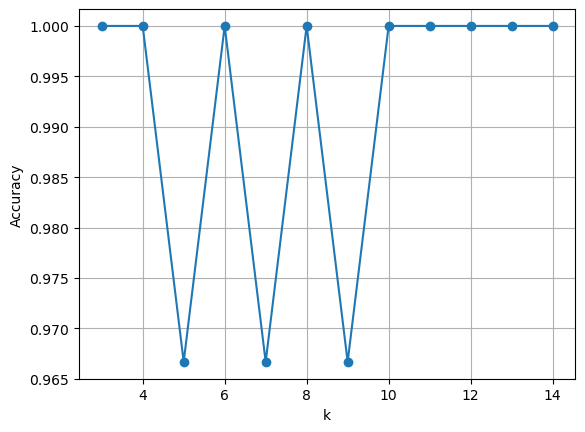

In [28]:
## To plot metric_k values
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [29]:
## To apply KNN classification 
classifier=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [30]:
## To print the accuracy in KNN classification
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 1.0


In [31]:
## To import SVC
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
## To create y_pred
y_pred=svmclf.predict(x_test)

In [34]:
## To print accuracy in SVC classification
from sklearn.metrics import accuracy_score
print('Accuracy =', accuracy_score(y_test,y_pred))

Accuracy = 0.9666666666666667


In [35]:
## To apply Decision tree classification
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
## To create y_pred
y_pred=dt_clf.predict(x_test)

In [37]:
## To print accuracy in Decision tree classification
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [38]:
## To apply Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
## To create y_pred
y_pred=dt_clf.predict(x_test)

In [40]:
## To print accuracy in Random Forest classification
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [41]:
## To apply Hyper parameter tuning
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [42]:
## To create y_pred
y_pred=rf_clf1.predict(x_test)

In [43]:
## To print accuracy in Hyper parameter tuning
print('Accuracy =', accuracy_score(y_test,y_pred))

Accuracy = 1.0
